In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import ghibtools as gh
from scipy import signal

In [3]:
srate =256

In [4]:
da = xr.load_dataarray('../dataarray/da_N2N3_P2.nc')

In [5]:
sig = da.loc['C4-T4',0:300]

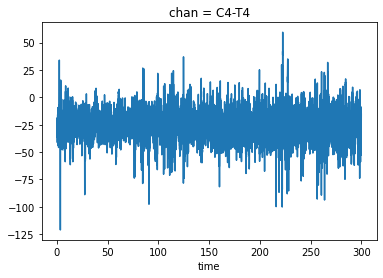

In [6]:
sig.plot()

In [7]:
da_tf = gh.tf(sig, srate= 256, f_start = 2 , f_stop = 102, n_step = 200, cycle_start = 3 , cycle_stop = 20, increase = 'linear')

In [8]:
gh.get_memory(da_tf)

0.12288160000000001 Go


In [9]:
modes = ['decibel','prctchange','ztransform','divide']
concat = []
for mode in modes:
    tf_scaled = gh.tf_power_law(da_tf, None, None, method = mode, decimate_factor=1)
    concat.append(tf_scaled)
tf_scaled_methods = xr.concat(concat, dim = 'method').assign_coords({'method':modes})

In [10]:
gh.get_memory(tf_scaled_methods)

0.49152640000000003 Go


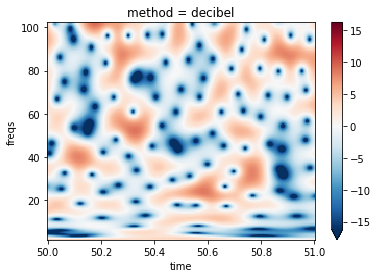

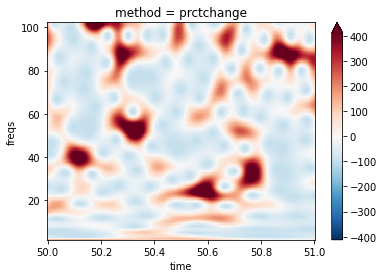

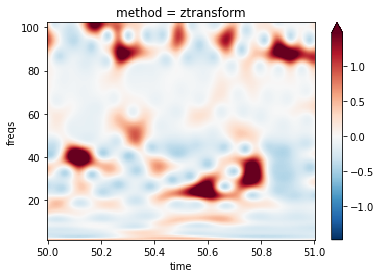

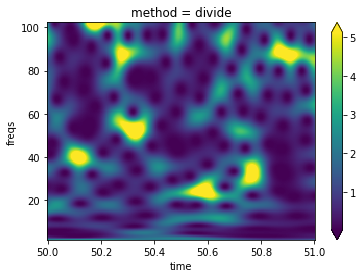

In [11]:
for method in modes:
    tf_scaled_methods.loc[method,:,50:51].plot.pcolormesh(x='time',y='freqs', robust = True, yscale='linear')
    plt.show()

In [12]:
np.arange(10,250,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240])

In [13]:
def epoching(da, triggs, start, stop):
    srate = 1 / np.median(np.diff(da.coords['time'].values))
    concat = []
    for trigg in triggs:
        concat.append(da.loc[:,trigg-start:trigg+stop].values)
    data = np.array(concat)
    da_trials = xr.DataArray(data=data, dims = ['trial','freqs','time'], coords = {'trial':np.arange(1,triggs.size+1,1), 'freqs':da.coords['freqs'].values, 'time':np.arange(0, data.shape[2]/srate, 1 / srate)})
    return da_trials

In [14]:
da_trials = epoching(tf_scaled_methods.loc['decibel',:,:], triggs = np.arange(10,250,10) , start = 0.5, stop = 0.5)

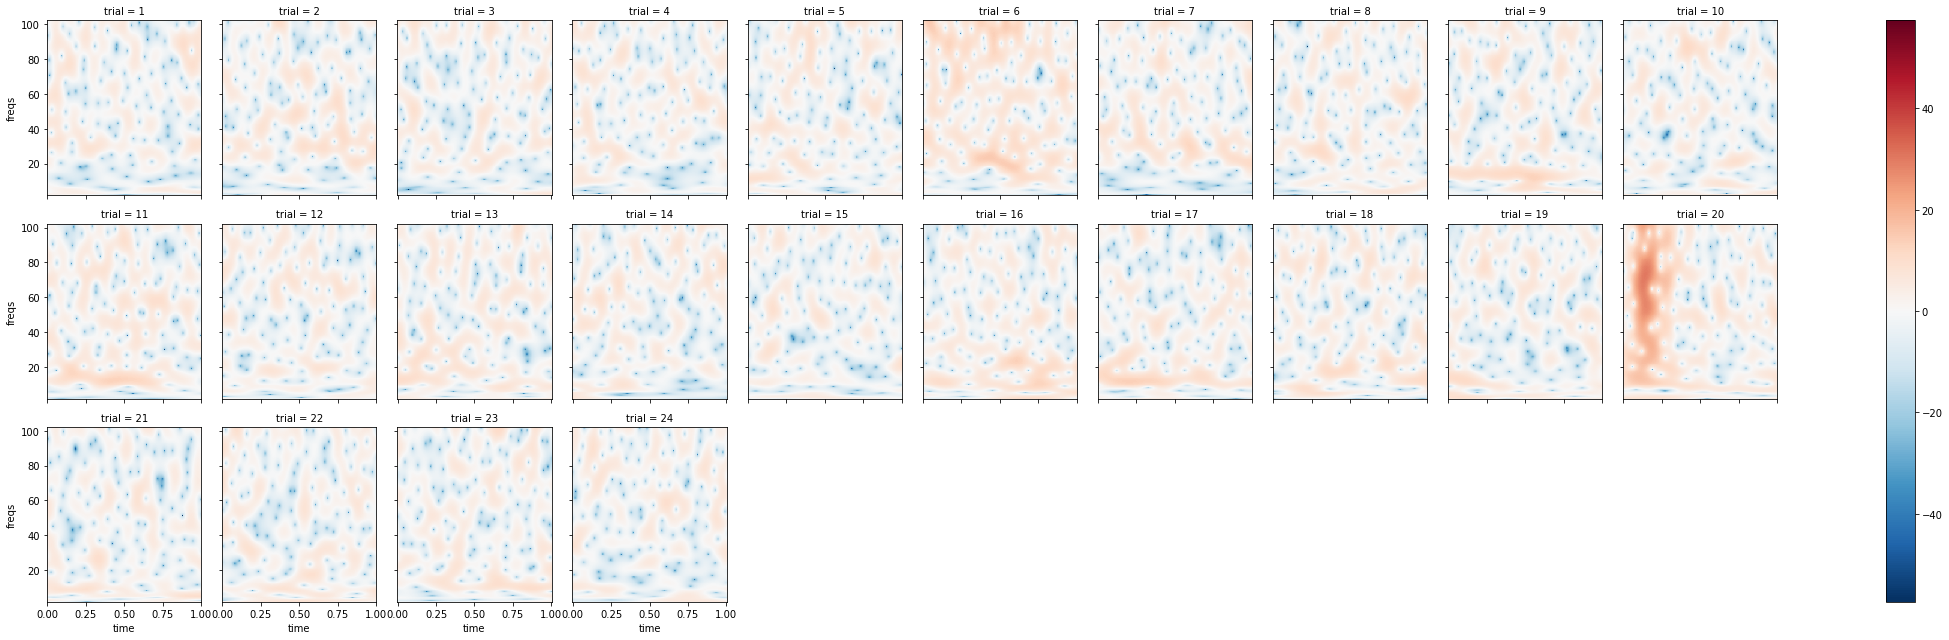

In [15]:
da_trials.plot.pcolormesh(x='time', col = 'trial', col_wrap = 10)

In [16]:
SNR = da_trials.mean('trial') / da_trials.std('trial')

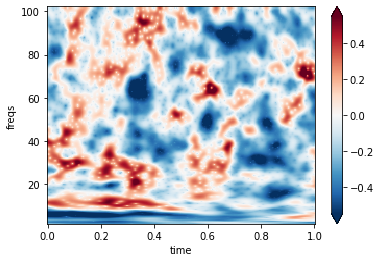

In [17]:
SNR.plot.pcolormesh(robust = True)

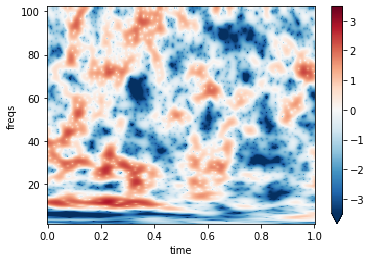

In [18]:
da_trials.mean('trial').plot.pcolormesh(robust = True)

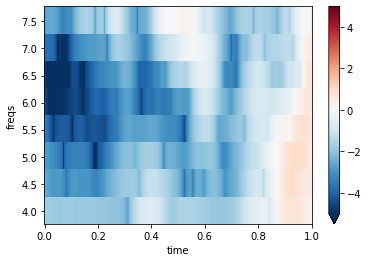

In [19]:
da_trials.loc[:,4:8,:].mean('trial').plot.pcolormesh(robust = True)

In [20]:
da_tf = gh.tf(sig, srate= 256, f_start = 2 , f_stop = 102, n_step = 200, cycle_start = 3 , cycle_stop = 20, increase = 'linear', extracted_feature='power', squaring = True)

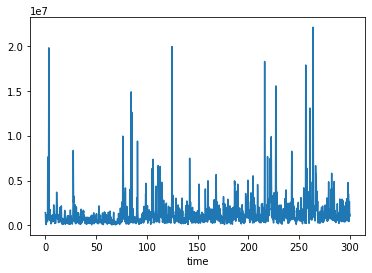

In [21]:
da_tf.loc[:,:].sum('freqs').plot()

In [22]:
da_tf

<xarray.DataArray (freqs: 200, time: 76801)>
array([[4.81439908e+05, 4.84551513e+05, 4.87387528e+05, ...,
        4.56551749e+05, 4.51452698e+05, 4.46294618e+05],
       [2.66479375e+05, 2.68561958e+05, 2.70419942e+05, ...,
        1.74243061e+05, 1.75794314e+05, 1.77118375e+05],
       [1.55561490e+05, 1.56922999e+05, 1.58116442e+05, ...,
        1.39602283e+05, 1.40340101e+05, 1.40816167e+05],
       ...,
       [1.87130063e+02, 1.88252202e+02, 1.83787011e+02, ...,
        5.45034743e+01, 5.89740335e+01, 6.20072809e+01],
       [1.86282165e+02, 1.87505232e+02, 1.83182158e+02, ...,
        5.46500600e+01, 5.90973666e+01, 6.20972681e+01],
       [1.85304298e+02, 1.86594871e+02, 1.82379855e+02, ...,
        5.46959038e+01, 5.91269080e+01, 6.21028349e+01]])
Coordinates:
  * freqs    (freqs) float64 2.0 2.503 3.005 3.508 ... 100.5 101.0 101.5 102.0
  * time     (time) float64 0.0 0.003906 0.007812 0.01172 ... 300.0 300.0 300.0

In [23]:
da_tf_epoched = epoching(da_tf, triggs=np.arange(10,250,10), start = 0.5 , stop = 0.5)

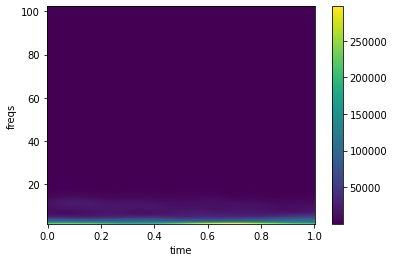

In [24]:
da_tf_epoched.mean('trial').plot()

In [25]:
da_tf_epoched

<xarray.DataArray (trial: 24, freqs: 200, time: 257)>
array([[[2.82515089e+05, 2.82640337e+05, 2.82654303e+05, ...,
         7.61834091e+04, 7.65719174e+04, 7.69209819e+04],
        [2.01299480e+05, 2.03488261e+05, 2.05613422e+05, ...,
         1.53528011e+05, 1.57749126e+05, 1.61959614e+05],
        [1.02925677e+05, 1.06041521e+05, 1.09177924e+05, ...,
         2.24581341e+05, 2.29411855e+05, 2.34225255e+05],
        ...,
        [5.13245653e-01, 5.87846050e-01, 6.65352076e-01, ...,
         1.24314266e+00, 1.41911041e+00, 1.58289711e+00],
        [6.05654227e-01, 6.63185168e-01, 7.21150008e-01, ...,
         1.06203830e+00, 1.21131979e+00, 1.34724195e+00],
        [7.02082579e-01, 7.37030270e-01, 7.70215206e-01, ...,
         9.08017179e-01, 1.03033750e+00, 1.13768938e+00]],

       [[4.35924387e+04, 4.04384440e+04, 3.73885299e+04, ...,
         4.16995370e+04, 3.95990526e+04, 3.75681535e+04],
        [3.73684568e+03, 3.17282373e+03, 2.69270522e+03, ...,
         2.02088297e+04, 1.87941993e+04, 1.74399539e+04],
        [9.86222572e+03, 1.00591757e+04, 1.03206979e+04, ...,
         4.07445948e+04, 3.99771317e+04, 3.92393734e+04],
...
        [1.54528836e+00, 1.59964948e+00, 1.59651764e+00, ...,
         4.37100650e-01, 4.55445119e-01, 4.86795345e-01],
        [1.51202943e+00, 1.57194382e+00, 1.57980292e+00, ...,
         3.91713130e-01, 4.02407042e-01, 4.27217542e-01],
        [1.47981244e+00, 1.54677695e+00, 1.56732073e+00, ...,
         3.37128959e-01, 3.41545451e-01, 3.61277773e-01]],

       [[3.88100350e+04, 3.88370752e+04, 3.88659049e+04, ...,
         5.23248935e+05, 5.16228824e+05, 5.09114484e+05],
        [2.33788050e+04, 2.34834609e+04, 2.35805507e+04, ...,
         2.05110578e+05, 1.96131327e+05, 1.87182987e+05],
        [1.46963003e+04, 1.54476772e+04, 1.61962346e+04, ...,
         1.00681843e+05, 9.61841454e+04, 9.17614014e+04],
        ...,
        [1.61819276e+00, 1.80860517e+00, 1.97107412e+00, ...,
         1.57832947e+00, 1.61043319e+00, 1.64043750e+00],
        [1.49990836e+00, 1.68557399e+00, 1.84526560e+00, ...,
         1.52821351e+00, 1.59413626e+00, 1.65986298e+00],
        [1.38618633e+00, 1.56604225e+00, 1.72185459e+00, ...,
         1.45147737e+00, 1.54960943e+00, 1.64962675e+00]]])
Coordinates:
  * trial    (trial) int64 1 2 3 4 5 6 7 8 9 10 ... 16 17 18 19 20 21 22 23 24
  * freqs    (freqs) float64 2.0 2.503 3.005 3.508 ... 100.5 101.0 101.5 102.0
  * time     (time) float64 0.0 0.003906 0.007812 0.01172 ... 0.9922 0.9961 1.0

In [28]:
da_itpc = gh.get_itpc(da_tf_epoched)

In [29]:
da_itpc

<xarray.DataArray (freqs: 200, time: 257)>
array([[0.43764879, 0.13694464, 0.05957636, ..., 0.09336019, 0.21514887,
        0.45826016],
       [0.22145087, 0.22448173, 0.05051619, ..., 0.4400646 , 0.03848384,
        0.12375545],
       [0.19946135, 0.23993433, 0.15170491, ..., 0.06721772, 0.16183043,
        0.23014177],
       ...,
       [0.74073773, 0.74065093, 0.67089658, ..., 0.71506683, 0.72009433,
        0.72547227],
       [0.76184828, 0.70774759, 0.67615558, ..., 0.70046347, 0.70647355,
        0.71357673],
       [0.74043359, 0.68450369, 0.72978545, ..., 0.68876316, 0.694789  ,
        0.70242417]])
Coordinates:
  * freqs    (freqs) float64 2.0 2.503 3.005 3.508 ... 100.5 101.0 101.5 102.0
  * time     (time) float64 0.0 0.003906 0.007812 0.01172 ... 0.9922 0.9961 1.0

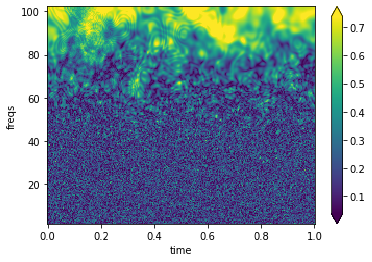

In [30]:
da_itpc.plot(robust = True)